Atividades
===

Essas atividade são relativas a aulas de Machine Learning.

> Lembre de criar uma `virtualenv` com os `requirements.txt` do repositório.

> Lembre de criar uma `kernel` do jupyter para seus desenvolvimentos

> Enviei apenas o seu notebook para correção. Não é necessário enviar nenhum outro arquivo. Siga o padrão `Atividades-<NOME-DO-ALUNO>.ipynb`

# Machine Learning

## 1. Classificação com *hold-out*.

## Imports

In [5]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit, RandomizedSearchCV
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
import time

import cv2
import csv
import numpy as np
import glob
import os
from skimage import feature
from skimage.feature import local_binary_pattern

## Carregue a base

In [2]:
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [3]:
X = np.array(df_diabetes.iloc[:, 0:8])
y = df_diabetes.iloc[:, -1]
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [4]:
# y = pd.factorize(y)
# y

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

y = labelencoder.fit_transform(y)
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

a) Utilize o método hold-out para dividir a base de dados [diabetes.csv](https://github.com/lapisco/machine_learning_course/blob/master/data/diabetes.csv) em treino e teste (50 iterações).

**help**: [factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html) (converte o rótulo da classe para 0 e 1) e [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) (divisão balanceada dos dados).

b) Use os classificadores MLP e QDA dentro do método hold-out do item anterior.

**help**: [Taxa de acerto do kNN com base Iris](https://github.com/lapisco/machine_learning_course/blob/master/ml.ipynb) (exemplo do kNN com hold-out), [QuadraticDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html) e [Multilayer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [5]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25)

times = []

print(type(X), type(y))
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#     print('y_train {} | y_test {}'.format(y_train, y_test))
    
    indexs, c = np.unique(y_test, return_counts=True)
    print(indexs, c)
    
    clf_mlp = MLPClassifier(solver='adam', learning_rate='adaptive', hidden_layer_sizes = (100,), 
                        max_iter=50, learning_rate_init=5e-04, tol=1e-4, random_state = 1)
    clf_mlp.fit(X_train, y_train)
    
    inicio1 = time.time()
    
    y_predicted_mlp = clf_mlp.predict(X_test)
    
    fim1 = time.time()
    total_time1 = fim1 - inicio1
    times.append(total_time1)
    
#     acc_mlp = np.sum(y_test == y_predicted_mlp)/len(y_test)
#     print('Accuracy MLP = {}'.format(acc_mlp))
    
    clf_qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    clf_qda.fit(X_train, y_train)
    
    inicio2 = time.time()
    
    y_predicted_qda = clf_qda.predict(X_test)
    
    fim2 = time.time()
    total_time2 = fim2 - inicio2
    times.append(total_time2)

#     acc_qda = np.sum(y_test == y_predicted_qda)/len(y_test)
#     print('Accuracy QDA = {}'.format(acc_qda))    

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[0 1] [125  67]


/home/raul/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


c) Calcule a média e o desvio padrão das métricas a seguir para os classificadores do item anterior:
- acurácia
- sensibilidade (recall)
- f1_score
- tempo de teste    

**help**: use as funções do [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html). Dica de leitura https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [6]:
acc = []
recall = []
f1 = []
acc_mlp = accuracy_score(y_test, y_predicted_mlp)
print('Accuracy MLP = {}'.format(acc_mlp))
# acc_mlp2 = accuracy_score(y_test, y_predicted_mlp,normalize=False)
# print(acc_mlp2)
acc.append(acc_mlp)

acc_qda = accuracy_score(y_test, y_predicted_qda)
print('Accuracy QDA = {}'.format(acc_qda))
# acc_qda2 = accuracy_score(y_test, y_predicted_qda,normalize=False)
# print(acc_qda2)
acc.append(acc_qda)

recall_mlp = recall_score(y_test, y_predicted_mlp, average='macro')
print('Recall MLP = {}'.format(recall_mlp))
recall.append(recall_mlp)

recall_qda = recall_score(y_test, y_predicted_qda, average='macro')
print('Recall QDA = {}'.format(recall_qda))
recall.append(recall_qda)

f1_mlp = f1_score(y_test, y_predicted_mlp, average='macro')
print('F1 score MLP = {}'.format(f1_mlp))
f1.append(f1_mlp)

f1_qda = f1_score(y_test, y_predicted_qda, average='macro')
print('F1 score QDA = {}'.format(f1_qda))
f1.append(f1_qda)

print('Time MLP = {}'.format(total_time1))
print('Time QDA = {}'.format(total_time2))

Accuracy MLP = 0.65625
Accuracy QDA = 0.6979166666666666
Recall MLP = 0.6078805970149254
Recall QDA = 0.632955223880597
F1 score MLP = 0.6101882613510521
F1 score QDA = 0.638206627680312
Time MLP = 0.0006229877471923828
Time QDA = 0.0006508827209472656


In [7]:
print('accuracy MLP | QDA ',acc)
print('recall MLP | QDA ',recall)
print('f1 MLP | QDA ',f1)
print('times MLP | QDA ',times)

acc_mean = np.mean(acc)
acc_std = np.std(acc)

recall_mean = np.mean(recall)
recall_std = np.std(recall)

f1_mean = np.mean(f1)
f1_std = np.std(f1)

time_mean = np.mean(times)
time_std = np.std(times)

print('mean accuracy {} | std accuracy {}'.format(acc_mean, acc_std))
print('mean recall {} | std recall {}'.format(recall_mean, recall_std))
print('mean f1 score {} | std f1 score {}'.format(f1_mean, f1_std))
print('mean of time {} | std of time {}'.format(time_mean, time_std))

accuracy MLP | QDA  [0.65625, 0.6979166666666666]
recall MLP | QDA  [0.6078805970149254, 0.632955223880597]
f1 MLP | QDA  [0.6101882613510521, 0.638206627680312]
times MLP | QDA  [0.0006229877471923828, 0.0006508827209472656]
mean accuracy 0.6770833333333333 | std accuracy 0.020833333333333315
mean recall 0.6204179104477612 | std recall 0.012537313432835817
mean f1 score 0.624197444515682 | std f1 score 0.014009183164629957
mean of time 0.0006369352340698242 | std of time 1.3947486877441406e-05


## 2. Gráfico de superfície de decisão

- Plote a superfície de decisão de todas as combinações de atributos para o SVM com kernel Linear e RBF usando a base de dados da Iris. Escolha os hiperparâmetros usando o RandomizedSearchCV.

**help**: [decision_surface_mlp()](https://github.com/lapisco/machine_learning_course/blob/master/ml.ipynb) (exemplo da superfície de decisão com MLP), [Random Search](https://github.com/lapisco/machine_learning_course/blob/master/ml.ipynb) (exemplo do RandomizedSearchCV)

In [8]:
def plot(X, y, model):

    clf = model

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    scat = plt.scatter(X[:, 0], X[:, 1], c=y,
                                          s=20, edgecolor='k')
    legends = plt.legend(*scat.legend_elements(), loc="upper left", title="SVM")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

In [9]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

clf_SVM_linear = SVC(kernel='linear')  
clf_SVM_rbf = SVC(kernel='rbf') 

classifiers = {'SVM-LINEAR': clf_SVM_linear, 'SVM-RBF': clf_SVM_rbf}

param_dist_dict = {'SVM-LINEAR': {'gamma': [2**i for i in range(-5,5)], 'C': [2**i for i in range(-5,5)]},
                   'SVM-RBF': {'gamma': [2**i for i in range(-5,5)], 'C': [2**i for i in range(-5,5)]}}

random_search = dict((k,[]) for k in classifiers.keys())
print("random search: {}".format(random_search))

for clf in param_dist_dict.keys():
    print('----------------------------------------------', clf,'----------------------------------------------')
    random_search[clf] = RandomizedSearchCV(classifiers[clf], param_dist_dict[clf], cv=3, n_iter=5, 
                                            verbose=5, scoring='accuracy')
    random_search[clf].fit(X, y)

random search: {'SVM-LINEAR': [], 'SVM-RBF': []}
---------------------------------------------- SVM-LINEAR ----------------------------------------------
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] gamma=8, C=0.03125 ..............................................
[CV] .................. gamma=8, C=0.03125, score=0.960, total=   0.0s
[CV] gamma=8, C=0.03125 ..............................................
[CV] .................. gamma=8, C=0.03125, score=0.900, total=   0.0s
[CV] gamma=8, C=0.03125 ..............................................
[CV] .................. gamma=8, C=0.03125, score=0.960, total=   0.0s
[CV] gamma=0.0625, C=4 ...............................................
[CV] ................... gamma=0.0625, C=4, score=0.980, total=   0.0s
[CV] gamma=0.0625, C=4 ...............................................
[CV] ................... gamma=0.0625, C=4, score=0.940, total=   0.0s
[CV] gamma=0.0625, C=4 ...............................................
[CV] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


In [10]:
clf_SVM_linear = random_search['SVM-LINEAR'].best_estimator_
clf_SVM_rbf = random_search['SVM-RBF'].best_estimator_

print("\n\nBest estimator: \n{} \n{}".format(clf_SVM_linear, clf_SVM_rbf))



Best estimator: 
SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


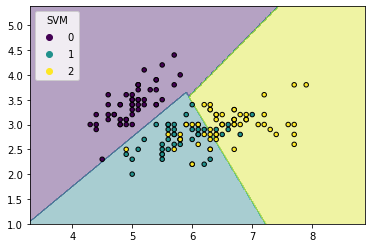

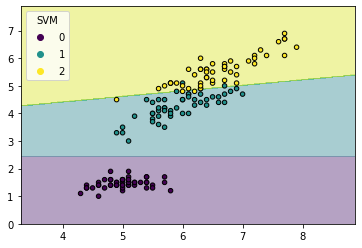

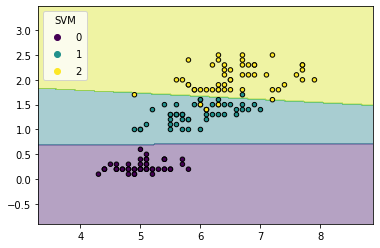

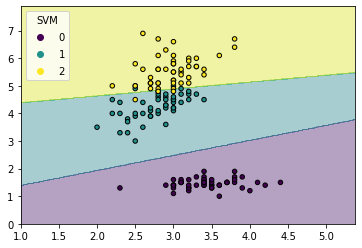

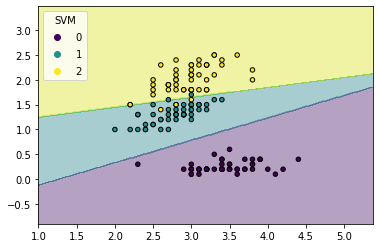

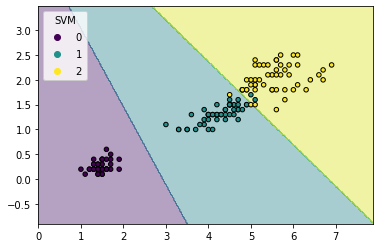

In [11]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

clf_SVM_linear_perfect = SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)  

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf_SVM_linear_perfect.fit(X, y)

    plot(X, y, clf_SVM_linear_perfect)

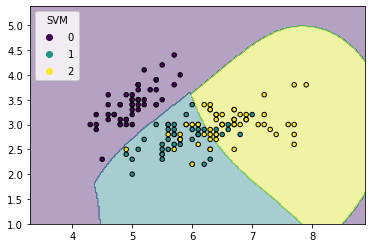

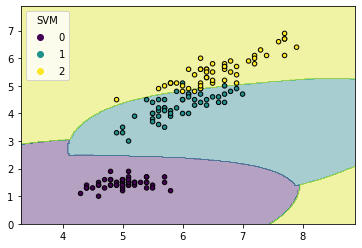

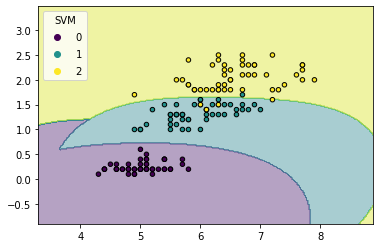

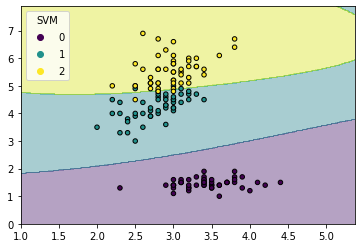

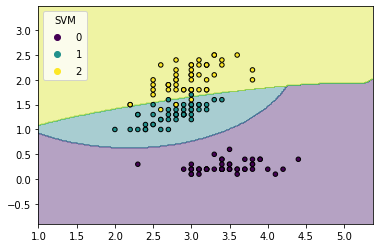

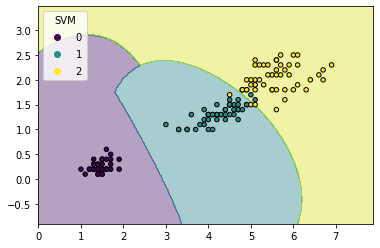

In [13]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

clf_SVM_rbf_perfect = SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)  
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf_SVM_rbf_perfect.fit(X, y)

    plot(X, y, clf_SVM_rbf_perfect)

## 3. Extração de atributos e classificação

a) Crie uma base de dados utilizando algum dos extratores de características visto no módulo 2 (LBP, HU ou GLCM) com as imagens do link a seguir. Cada imagem representará uma amostra e seus atributos serão obtidos pelo extrator escolhido. Use o nome do arquivo para saber a classe. Por exemplo, ``P01_01.JPG`` será a 1&deg; amostra e sua classe será a 1, enquanto a imagem ``P02_02.JPG`` será a 42&deg; amostra e sua classe será a 2. Ao final, sua base de dados deve ser composta por 600 amostras com 15 classes (40 amostras por classe). \
[Imagens](https://www.dropbox.com/sh/fwp8l3jt1hbd5ya/AAByxHuzLK_EFLawWieR1eUHa?dl=0) \
[Site com a descrição](https://lapisco.ifce.edu.br/producao-academica/private-datasets/image-database-of-virtual-and-real-environment-for-mobile-robot-localization-from-gopro/)

In [1]:
!wget https://www.dropbox.com/sh/fwp8l3jt1hbd5ya/AAByxHuzLK_EFLawWieR1eUHa?dl=0

--2021-03-05 21:42:51--  https://www.dropbox.com/sh/fwp8l3jt1hbd5ya/AAByxHuzLK_EFLawWieR1eUHa?dl=0
Resolvendo www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Conectando-se a www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 301 Moved Permanently
Localização: /sh/raw/fwp8l3jt1hbd5ya/AAByxHuzLK_EFLawWieR1eUHa [redirecionando]
--2021-03-05 21:42:52--  https://www.dropbox.com/sh/raw/fwp8l3jt1hbd5ya/AAByxHuzLK_EFLawWieR1eUHa
Reaproveitando a conexão existente para www.dropbox.com:443.
A requisição HTTP foi enviada, aguardando resposta... 302 Found
Localização: https://uc8afb15f4c89813fe2099162000.dl.dropboxusercontent.com/zip_download_get/AtjvzfphVac_qmqdBMfOXGyabJcrohwbedN-1S1YBN-GfUCja0Dgvilrlme6MlFPBZJl93ea7ndXNfSissu2rGq5v_ZUVHR7b3LcC9jkO1UNcA [redirecionando]
--2021-03-05 21:42:52--  https://uc8afb15f4c89813fe2099162000.dl.dropboxusercontent.com/zip_download_get/AtjvzfphVac_qmqdBMfOXGyab

In [6]:
# Testing a way to make the classification.
dict_classes = {'P01': 1, 'P02': 2, 'P03': 3,
'P04': 4,'P05': 5,'P06': 6,'P07': 7,'P08': 8,'P09': 9,'P10': 10,'P11': 11,'P12': 12,'P13': 13,'P14': 14,'P15': 15,}

string_test = 'teste/P01_02.JPG'

for i in dict_classes:
    if i in string_test:
        print('pertence a classe : ', dict_classes[i])

pertence a classe :  1


In [7]:
class Extraction():
    def __init__(self, path_image):
        self.path_image = path_image

    def features_extractor(self, number_points, radius, distances, angles, eps=1e-7):
        
        dict_classes = {'P01': 1, 'P02': 2, 'P03': 3,
        'P04': 4,'P05': 5,'P06': 6,'P07': 7,'P08': 8,'P09': 9,'P10': 10,'P11': 11,'P12': 12,'P13': 13,'P14': 14,'P15': 15,}
        
        features_extract = []
        final_vector = []

        for i, image in enumerate(self.path_image):
      
            workaround = ''
            class_of_image = 0
            for c in self.path_image:
                workaround = c
                
            print('[INFO] Extracting features of image {}'.format(self.path_image))
            for d in dict_classes:
                if d in workaround:
                    class_of_image = [dict_classes[d]]
                    print('This image belongs to the class:', class_of_image)

            # Load the rgb image
            file = cv2.imread(image)

            # Convert to grayscale
            file = cv2.cvtColor(file, cv2.COLOR_BGR2GRAY)

            # Extract the moments
            moments = cv2.moments(file)
#             # Extract lbp
#             lbp = feature.local_binary_pattern(file, number_points, radius, method='uniform')
#             # Extract lbp
#             glcm = feature.greycomatrix(file, distances, angles, 256, symmetric=False, normed=True)

            # ----------------------------------------------------------------------------------------
            
            # Create a list with the features extracted
            hu_moments = cv2.HuMoments(moments)
            new_moments = [moment[0] for moment in hu_moments]
            
            features_extract.append(new_moments)
            
            # ----------------------------------------------------------------------------------------
            
#             # Calculates the histogram of the lbp image
#             hist, ret = np.histogram(lbp.ravel(), bins=np.arange(0, number_points + 3), range=(0, number_points + 2))

#             hist = hist.astype('float')
#             hist /= (hist.sum() + eps)

#             # Create the feature vector extracted by lbp
#             image_lbp = [item for item in list(hist)]

#             features_extract.append(image_lbp)

            # ----------------------------------------------------------------------------------------
            
#             # Create a list with the features of GLCM
#             glcm_properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
#             features = [feature.greycoprops(glcm, glcm_property)[0, 0] for glcm_property in glcm_properties]

#             features_extract.append(features)

            features_extract.append(class_of_image)
            
        columns = []
#         tags = ['HU', 'LBP', 'GLCM', 'class']
        tags = ['HU', 'class']
        tag_pos = 0
        for g in features_extract:
            num_iter = len(g)
            for i in range(num_iter):
                columns.append(tags[tag_pos] + '{}'.format(i))

            tag_pos = tag_pos + 1
            
        print('\n')
        
        for k in features_extract:
            for l in k:
                final_vector.append(l)
                
        final_vector = np.array(final_vector)
                

        self.save_results('dataset_extractions', final_vector, columns)
        return (final_vector, columns)

    def save_results(self, extractor_name, feat, columns):

        # Save all features in a csv file
        with open(extractor_name + '.csv', 'a') as outfile:
            writer = csv.writer(outfile)
            writer.writerow(feat)
            
#             writer.writerows(map(lambda x: [x], feat))
#             writer.writerows(feat)

In [8]:
path = 'roboHomeGoPro/'
for r, d, f in os.walk(path):
    for filename in f:
        #Making extractions.
#         print(f)
        extractions = Extraction(glob.glob(os.path.join(path, filename)))
        _, columns = extractions.features_extractor(number_points=24, radius=8, distances=[5], angles=[0])

[INFO] Extracting features of image ['roboHomeGoPro/P04_33.JPG']
This image belongs to the class: [4]


[INFO] Extracting features of image ['roboHomeGoPro/P01_25.JPG']
This image belongs to the class: [1]


[INFO] Extracting features of image ['roboHomeGoPro/P03_34.JPG']
This image belongs to the class: [3]


[INFO] Extracting features of image ['roboHomeGoPro/P03_20.JPG']
This image belongs to the class: [3]


[INFO] Extracting features of image ['roboHomeGoPro/P09_21.JPG']
This image belongs to the class: [9]


[INFO] Extracting features of image ['roboHomeGoPro/P02_40.JPG']
This image belongs to the class: [2]


[INFO] Extracting features of image ['roboHomeGoPro/P10_06.JPG']
This image belongs to the class: [10]


[INFO] Extracting features of image ['roboHomeGoPro/P07_40.JPG']
This image belongs to the class: [7]


[INFO] Extracting features of image ['roboHomeGoPro/P04_32.JPG']
This image belongs to the class: [4]


[INFO] Extracting features of image ['roboHomeGoPro/P02_26.JPG'



[INFO] Extracting features of image ['roboHomeGoPro/P15_02.JPG']
This image belongs to the class: [15]


[INFO] Extracting features of image ['roboHomeGoPro/P12_13.JPG']
This image belongs to the class: [12]


[INFO] Extracting features of image ['roboHomeGoPro/P04_38.JPG']
This image belongs to the class: [4]


[INFO] Extracting features of image ['roboHomeGoPro/P13_40.JPG']
This image belongs to the class: [13]


[INFO] Extracting features of image ['roboHomeGoPro/P02_03.JPG']
This image belongs to the class: [2]


[INFO] Extracting features of image ['roboHomeGoPro/P13_29.JPG']
This image belongs to the class: [13]


[INFO] Extracting features of image ['roboHomeGoPro/P05_11.JPG']
This image belongs to the class: [5]


[INFO] Extracting features of image ['roboHomeGoPro/P06_11.JPG']
This image belongs to the class: [6]


[INFO] Extracting features of image ['roboHomeGoPro/P06_27.JPG']
This image belongs to the class: [6]


[INFO] Extracting features of image ['roboHomeGoPro/P13_31



[INFO] Extracting features of image ['roboHomeGoPro/P05_13.JPG']
This image belongs to the class: [5]


[INFO] Extracting features of image ['roboHomeGoPro/P08_14.JPG']
This image belongs to the class: [8]


[INFO] Extracting features of image ['roboHomeGoPro/P10_27.JPG']
This image belongs to the class: [10]


[INFO] Extracting features of image ['roboHomeGoPro/P09_02.JPG']
This image belongs to the class: [9]


[INFO] Extracting features of image ['roboHomeGoPro/P02_15.JPG']
This image belongs to the class: [2]


[INFO] Extracting features of image ['roboHomeGoPro/P11_39.JPG']
This image belongs to the class: [11]


[INFO] Extracting features of image ['roboHomeGoPro/P09_30.JPG']
This image belongs to the class: [9]


[INFO] Extracting features of image ['roboHomeGoPro/P03_09.JPG']
This image belongs to the class: [3]


[INFO] Extracting features of image ['roboHomeGoPro/P08_23.JPG']
This image belongs to the class: [8]


[INFO] Extracting features of image ['roboHomeGoPro/P04_40.J



[INFO] Extracting features of image ['roboHomeGoPro/P03_30.JPG']
This image belongs to the class: [3]


[INFO] Extracting features of image ['roboHomeGoPro/P14_10.JPG']
This image belongs to the class: [14]


[INFO] Extracting features of image ['roboHomeGoPro/P15_05.JPG']
This image belongs to the class: [15]


[INFO] Extracting features of image ['roboHomeGoPro/P03_23.JPG']
This image belongs to the class: [3]


[INFO] Extracting features of image ['roboHomeGoPro/P06_04.JPG']
This image belongs to the class: [6]


[INFO] Extracting features of image ['roboHomeGoPro/P12_14.JPG']
This image belongs to the class: [12]


[INFO] Extracting features of image ['roboHomeGoPro/P05_39.JPG']
This image belongs to the class: [5]


[INFO] Extracting features of image ['roboHomeGoPro/P11_36.JPG']
This image belongs to the class: [11]


[INFO] Extracting features of image ['roboHomeGoPro/P12_34.JPG']
This image belongs to the class: [12]


[INFO] Extracting features of image ['roboHomeGoPro/P07_2



[INFO] Extracting features of image ['roboHomeGoPro/P10_32.JPG']
This image belongs to the class: [10]


[INFO] Extracting features of image ['roboHomeGoPro/P04_19.JPG']
This image belongs to the class: [4]


[INFO] Extracting features of image ['roboHomeGoPro/P03_26.JPG']
This image belongs to the class: [3]


[INFO] Extracting features of image ['roboHomeGoPro/P09_34.JPG']
This image belongs to the class: [9]


[INFO] Extracting features of image ['roboHomeGoPro/P07_25.JPG']
This image belongs to the class: [7]


[INFO] Extracting features of image ['roboHomeGoPro/P15_23.JPG']
This image belongs to the class: [15]


[INFO] Extracting features of image ['roboHomeGoPro/P08_02.JPG']
This image belongs to the class: [8]


[INFO] Extracting features of image ['roboHomeGoPro/P15_18.JPG']
This image belongs to the class: [15]


[INFO] Extracting features of image ['roboHomeGoPro/P14_16.JPG']
This image belongs to the class: [14]


[INFO] Extracting features of image ['roboHomeGoPro/P11_28



[INFO] Extracting features of image ['roboHomeGoPro/P11_19.JPG']
This image belongs to the class: [11]


[INFO] Extracting features of image ['roboHomeGoPro/P13_06.JPG']
This image belongs to the class: [13]


[INFO] Extracting features of image ['roboHomeGoPro/P10_40.JPG']
This image belongs to the class: [10]


[INFO] Extracting features of image ['roboHomeGoPro/P07_05.JPG']
This image belongs to the class: [7]


[INFO] Extracting features of image ['roboHomeGoPro/P15_01.JPG']
This image belongs to the class: [15]


[INFO] Extracting features of image ['roboHomeGoPro/P08_40.JPG']
This image belongs to the class: [8]


[INFO] Extracting features of image ['roboHomeGoPro/P01_22.JPG']
This image belongs to the class: [1]


[INFO] Extracting features of image ['roboHomeGoPro/P15_33.JPG']
This image belongs to the class: [15]


[INFO] Extracting features of image ['roboHomeGoPro/P03_10.JPG']
This image belongs to the class: [3]


[INFO] Extracting features of image ['roboHomeGoPro/P04_2



[INFO] Extracting features of image ['roboHomeGoPro/P06_26.JPG']
This image belongs to the class: [6]


[INFO] Extracting features of image ['roboHomeGoPro/P12_15.JPG']
This image belongs to the class: [12]


[INFO] Extracting features of image ['roboHomeGoPro/P03_02.JPG']
This image belongs to the class: [3]


[INFO] Extracting features of image ['roboHomeGoPro/P01_34.JPG']
This image belongs to the class: [1]


[INFO] Extracting features of image ['roboHomeGoPro/P09_11.JPG']
This image belongs to the class: [9]


[INFO] Extracting features of image ['roboHomeGoPro/P14_20.JPG']
This image belongs to the class: [14]


[INFO] Extracting features of image ['roboHomeGoPro/P14_28.JPG']
This image belongs to the class: [14]


[INFO] Extracting features of image ['roboHomeGoPro/P13_23.JPG']
This image belongs to the class: [13]


[INFO] Extracting features of image ['roboHomeGoPro/P15_40.JPG']
This image belongs to the class: [15]


[INFO] Extracting features of image ['roboHomeGoPro/P13_0



[INFO] Extracting features of image ['roboHomeGoPro/P02_22.JPG']
This image belongs to the class: [2]


[INFO] Extracting features of image ['roboHomeGoPro/P06_15.JPG']
This image belongs to the class: [6]


[INFO] Extracting features of image ['roboHomeGoPro/P10_30.JPG']
This image belongs to the class: [10]


[INFO] Extracting features of image ['roboHomeGoPro/P12_35.JPG']
This image belongs to the class: [12]


[INFO] Extracting features of image ['roboHomeGoPro/P07_13.JPG']
This image belongs to the class: [7]


[INFO] Extracting features of image ['roboHomeGoPro/P01_11.JPG']
This image belongs to the class: [1]


[INFO] Extracting features of image ['roboHomeGoPro/P08_26.JPG']
This image belongs to the class: [8]


[INFO] Extracting features of image ['roboHomeGoPro/P02_38.JPG']
This image belongs to the class: [2]


[INFO] Extracting features of image ['roboHomeGoPro/P03_22.JPG']
This image belongs to the class: [3]


[INFO] Extracting features of image ['roboHomeGoPro/P07_04.J

In [9]:
print(columns)

['HU0', 'HU1', 'HU2', 'HU3', 'HU4', 'HU5', 'HU6', 'class0']


In [10]:
df_images = pd.read_csv('dataset_extractions.csv', names=columns)
df_images

,HU0,HU1,HU2,HU3,HU4,HU5,HU6,class0
0,0.001930,1.439172e-07,1.213364e-10,1.132642e-10,8.401407e-21,3.815385e-14,-1.028218e-20,4.0
1,0.001635,1.393399e-07,2.017834e-12,5.325804e-11,-5.513077e-22,1.847909e-14,-2.963404e-23,1.0
2,0.001899,3.679079e-09,6.101668e-11,2.534795e-11,5.131986e-23,2.921524e-16,-9.955479e-22,3.0
3,0.001849,3.966681e-09,2.671450e-10,5.492107e-11,5.514583e-21,-6.235361e-16,-3.720827e-21,3.0
4,0.001712,1.294239e-07,2.389863e-11,5.489888e-12,6.212546e-23,-1.916039e-15,9.729938e-24,9.0
...,...,...,...,...,...,...,...,...
595,0.001627,1.463292e-07,6.227211e-12,4.207618e-11,-6.590517e-22,1.470714e-14,-1.718360e-22,1.0
596,0.001633,1.460319e-07,1.131570e-11,4.891320e-11,-9.214757e-22,1.789318e-14,-6.892757e-22,1.0
597,0.001585,1.436172e-07,9.347123e-12,5.899026e-12,-4.144946e-23,1.118709e-15,1.416667e-23,10.0
598,0.001544,1.636184e-07,7.462280e-12,5.359172e-12,-1.743357e-23,-3.861304e-16,2.906303e-23,15.0


b) Repita a primeira questão com a base de dados criada no item anterior.

In [11]:
X_HU = np.array(df_images.iloc[:, 0:7])
y_HU = df_images.iloc[:, -1]

In [12]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25)

times = []

for train_index, test_index in sss.split(X_HU, y_HU):
    X_train, X_test = X_HU[train_index], X_HU[test_index]
    y_train, y_test = y_HU[train_index], y_HU[test_index]
    
#     print('y_train {} | y_test {}'.format(y_train, y_test))
    
    indexs, c = np.unique(y_test, return_counts=True)
    print(indexs, c)
    
    clf_mlp = MLPClassifier(solver='adam', learning_rate='adaptive', hidden_layer_sizes = (100,), 
                        max_iter=50, learning_rate_init=5e-04, tol=1e-4, random_state = 1)
    clf_mlp.fit(X_train, y_train)
    
    inicio1 = time.time()
    
    y_predicted_mlp = clf_mlp.predict(X_test)
    
    fim1 = time.time()
    total_time1 = fim1 - inicio1
    times.append(total_time1)
    
    clf_qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    clf_qda.fit(X_train, y_train)
    
    inicio2 = time.time()
    
    y_predicted_qda = clf_qda.predict(X_test)
    
    fim2 = time.time()
    total_time2 = fim2 - inicio2
    times.append(total_time2)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.] [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]


/home/raul/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/raul/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [13]:
acc = []
recall = []
f1 = []
acc_mlp = accuracy_score(y_test, y_predicted_mlp)
print('Accuracy MLP = {}'.format(acc_mlp))
# acc_mlp2 = accuracy_score(y_test, y_predicted_mlp,normalize=False)
# print(acc_mlp2)
acc.append(acc_mlp)

acc_qda = accuracy_score(y_test, y_predicted_qda)
print('Accuracy QDA = {}'.format(acc_qda))
# acc_qda2 = accuracy_score(y_test, y_predicted_qda,normalize=False)
# print(acc_qda2)
acc.append(acc_qda)

recall_mlp = recall_score(y_test, y_predicted_mlp, average='macro')
print('Recall MLP = {}'.format(recall_mlp))
recall.append(recall_mlp)

recall_qda = recall_score(y_test, y_predicted_qda, average='macro')
print('Recall QDA = {}'.format(recall_qda))
recall.append(recall_qda)

f1_mlp = f1_score(y_test, y_predicted_mlp, average='macro')
print('F1 score MLP = {}'.format(f1_mlp))
f1.append(f1_mlp)

f1_qda = f1_score(y_test, y_predicted_qda, average='macro')
print('F1 score QDA = {}'.format(f1_qda))
f1.append(f1_qda)

print('Time MLP = {}'.format(total_time1))
print('Time QDA = {}'.format(total_time2))

Accuracy MLP = 0.06666666666666667
Accuracy QDA = 0.98
Recall MLP = 0.06666666666666667
Recall QDA = 0.9800000000000001
F1 score MLP = 0.008333333333333333
F1 score QDA = 0.9798486114275587
Time MLP = 0.0009872913360595703
Time QDA = 0.0007331371307373047


In [14]:
print('accuracy MLP | QDA ',acc)
print('recall MLP | QDA ',recall)
print('f1 MLP | QDA ',f1)
print('times MLP | QDA ',times)

acc_mean = np.mean(acc)
acc_std = np.std(acc)

recall_mean = np.mean(recall)
recall_std = np.std(recall)

f1_mean = np.mean(f1)
f1_std = np.std(f1)

time_mean = np.mean(times)
time_std = np.std(times)

print('mean accuracy {} | std accuracy {}'.format(acc_mean, acc_std))
print('mean recall {} | std recall {}'.format(recall_mean, recall_std))
print('mean f1 score {} | std f1 score {}'.format(f1_mean, f1_std))
print('mean of time {} | std of time {}'.format(time_mean, time_std))

accuracy MLP | QDA  [0.06666666666666667, 0.98]
recall MLP | QDA  [0.06666666666666667, 0.9800000000000001]
f1 MLP | QDA  [0.008333333333333333, 0.9798486114275587]
times MLP | QDA  [0.0009872913360595703, 0.0007331371307373047]
mean accuracy 0.5233333333333333 | std accuracy 0.45666666666666667
mean recall 0.5233333333333334 | std recall 0.4566666666666667
mean f1 score 0.494090972380446 | std f1 score 0.4857576390471127
mean of time 0.0008602142333984375 | std of time 0.0001270771026611328
